In [9]:
import numpy as np
import pandas as pd 

# css 파일 읽기
df = pd.read_excel("IMDB top 1000.xlsx")

# numpy 로 변환
data_array = df.to_numpy()

print(df.shape)

(1000, 10)


In [50]:
import numpy as np
import pandas as pd 

# css 파일 읽기
df = pd.read_excel("IMDB top 1000.xlsx")

# numpy 로 변환
data_array = df.to_numpy()
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")

movie_count=len(df)
movie_rate=df["Rate"].mean()
the_best=df["Rate"].max()
the_worst=df["Rate"].min()

print(f"영화 개수는 {movie_count}개다")
print(f"점수들 평균은 {movie_rate}이다")
print(f"제일 높은 점수는 {the_best}이다")
print(f"제일 높은 점수는 {the_worst}이다")




영화 개수는 1000개다
점수들 평균은 8.0975이다
제일 높은 점수는 9.3이다
제일 높은 점수는 8.0이다


In [24]:
import numpy as np
import pandas as pd 

# css 파일 읽기
df = pd.read_excel("IMDB top 1000.xlsx")

# numpy 로 변환
data_array = df.to_numpy()
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")

best_movie=df.loc[df["Rate"].idxmax()]

print(f"1등: {best_movie['Title']} - {best_movie['Rate']}점")


1등: 1. The Shawshank Redemption (1994) - 9.3점


In [22]:
import numpy as np
import pandas as pd 

# css 파일 읽기
df = pd.read_excel("IMDB top 1000.xlsx")

# numpy 로 변환
data_array = df.to_numpy()
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")

# 장르 분리 후 펼치기
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")  # 평점을 숫자로 변환
genres_expanded = df.assign(Genre=df["Genre"].str.split(",")).explode("Genre")

# 공백 제거
genres_expanded["Genre"] = genres_expanded["Genre"].str.strip()

# 장르별 영화 개수와 평균 평점
genre_stats = genres_expanded.groupby("Genre")["Rate"].agg(["count", "mean"]).sort_values("count", ascending=False)

print(genre_stats)





           count      mean
Genre                     
Drama        728  8.101374
Adventure    211  8.093365
Comedy       208  8.075000
Action       207  8.089372
Crime        176  8.119318
Thriller     165  8.072727
Romance      147  8.077551
Biography    129  8.066667
Mystery      103  8.109709
Animation    100  8.059000
History       66  8.093939
Sci-Fi        63  8.109524
Fantasy       53  8.113208
War           37  8.205405
Family        30  8.160000
Music         28  8.082143
Film-Noir     17  8.129412
Horror        13  8.192308
Musical       12  8.091667
Sport          8  8.175000
Western        7  8.357143


In [27]:
import numpy as np
import pandas as pd 

# css 파일 읽기
df = pd.read_excel("IMDB top 1000.xlsx")

# numpy 로 변환
data_array = df.to_numpy()
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")

import re

# Title에서 연도만 추출 (정규표현식)
df["Year"] = df["Title"].str.extract(r"\((\d{4})\)")

# 숫자로 변환
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")


# 연도별 영화 개수와 평균 평점
year_stats = df.groupby("Year")["Rate"].agg(["count","mean"]).sort_index()


print(year_stats)


      count      mean
Year                 
1920      7  8.100000
1921      1  8.300000
1924      1  8.200000
1925      1  8.200000
1926      7  8.100000
...     ...       ...
2016     42  8.030952
2017     18  8.066667
2018     28  8.078571
2019     25  8.124000
2020      1  8.700000

[87 rows x 2 columns]


In [17]:
# 1) Info에서 votes 숫자만 추출 → 새 컬럼 'Votes'
df["Votes"] = (
    df["Info"]
      .astype(str)
      .str.replace(",", "", regex=False)   # 1,234,567 → 1234567
      .str.extract(r"(\d+)")               # 숫자만 뽑기
      .astype(float)                       # 숫자형으로
)

# 2) 결측치 제거(혹시 votes 없는 행)
df_votes = df.dropna(subset=["Votes"])

# 3) 투표 수 기준 내림차순 정렬 후 상위 100개
top100_votes = df_votes.sort_values("Votes", ascending=False).head(10)

# 4) 원하는 컬럼만 보기 (제목 + 투표수 + 평점 등)
print(top100_votes[["Title", "Votes", "Rate"]])


                                                Title      Votes  Rate
0                  1. The Shawshank Redemption (1994)  2295987.0   9.3
2                           3. The Dark Knight (2008)  2260649.0   9.0
8                                 9. Inception (2010)  2022655.0   8.8
9                               10. Fight Club (1999)  1820268.0   8.8
5                              6. Pulp Fiction (1994)  1792919.0   8.9
11                            12. Forrest Gump (1994)  1769309.0   8.8
15                              16. The Matrix (1999)  1643911.0   8.7
10  11. The Lord of the Rings: The Fellowship of t...  1630106.0   8.8
4   5. The Lord of the Rings: The Return of the Ki...  1614369.0   8.9
1                             2. The Godfather (1972)  1584782.0   9.2


1920년대 Top3 장르
 1등: Comedy (17편)
 2등: Drama (17편)
 3등: Romance (15편)

1930년대 Top3 장르
 1등: Drama (23편)
 2등: Comedy (16편)
 3등: Romance (15편)

1940년대 Top3 장르
 1등: Drama (35편)
 2등: Romance (22편)
 3등: Mystery (15편)

1950년대 Top3 장르
 1등: Drama (60편)
 2등: Thriller (19편)
 3등: Adventure (18편)

1960년대 Top3 장르
 1등: Drama (19편)
 2등: Crime (5편)
 3등: Mystery (4편)

1970년대 Top3 장르
 1등: Drama (19편)
 2등: Crime (6편)
 3등: Comedy (5편)

1980년대 Top3 장르
 1등: Drama (19편)
 2등: Adventure (11편)
 3등: Action (8편)

1990년대 Top3 장르
 1등: Drama (101편)
 2등: Crime (46편)
 3등: Animation (39편)

2000년대 Top3 장르
 1등: Drama (208편)
 2등: Action (70편)
 3등: Adventure (69편)

2010년대 Top3 장르
 1등: Drama (226편)
 2등: Action (81편)
 3등: Adventure (79편)

2020년대 Top3 장르
 1등: Biography (1편)
 2등: Drama (1편)
 3등: History (1편)



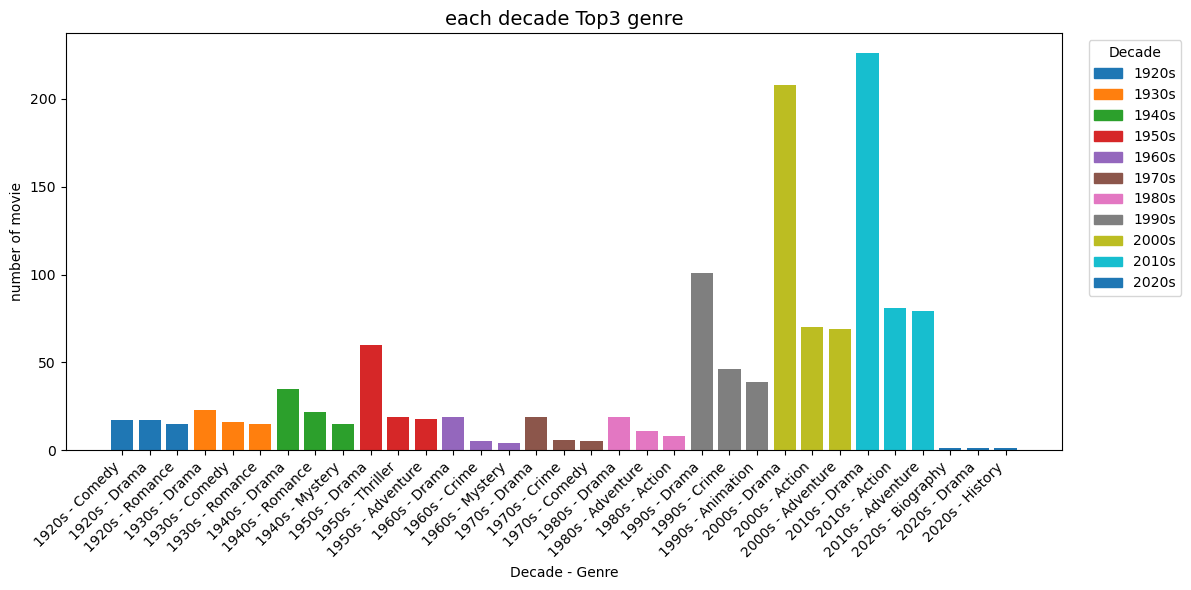

In [ ]:

# 1. 연도를 10년 단위로 묶기
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Decade"] = (df["Year"] // 10) * 10   # 1994 → 1990, 2015 → 2010

# 2. 장르 분리해서 펼치기
genres_expanded = df.assign(Genre=df["Genre"].str.split(",")).explode("Genre")
genres_expanded["Genre"] = genres_expanded["Genre"].str.strip()

# 3. 10년 단위 + 장르별 영화 개수 세기
decade_genre_counts = (
    genres_expanded.groupby(["Decade", "Genre"])
    .size()
    .reset_index(name="Count")
)

# 4. 각 10년대별 TOP3 뽑기
top3_per_decade = (
    decade_genre_counts.sort_values(["Decade", "Count"], ascending=[True, False])
    .groupby("Decade")
    .head(3)
)

# 5. 보기 좋게 출력
for decade in sorted(top3_per_decade["Decade"].unique()):
    subset = top3_per_decade[top3_per_decade["Decade"] == decade]
    print(f"{decade}년대 Top3 장르")
    for i, row in enumerate(subset.itertuples(), 1):
        print(f" {i}등: {row.Genre} ({row.Count}편)")
    print()

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 보기 좋게 정렬
top3_plot = top3_per_decade.sort_values(["Decade", "Count"], ascending=[True, False])

# 라벨: "1990s - Drama"
labels = top3_plot["Decade"].astype(int).astype(str) + "s - " + top3_plot["Genre"]

# Decade별 색상 매핑
decades = top3_plot["Decade"].unique()
color_map = {dec: cm.tab10(i % 10) for i, dec in enumerate(decades)}
colors = top3_plot["Decade"].map(color_map)

plt.figure(figsize=(12,6))
plt.bar(labels, top3_plot["Count"], color=colors)

# 그래프 꾸미기
plt.xticks(rotation=45, ha="right")
plt.title("each decade's Top3 genres", fontsize=14)
plt.xlabel("Decade - Genre")
plt.ylabel("number of movie")

# 범례: decade별
handles = [plt.Rectangle((0,0),1,1, color=color_map[d]) for d in decades]
plt.legend(handles, [f"{int(d)}s" for d in decades], title="Decade", bbox_to_anchor=(1.02,1), loc="upper left")

plt.tight_layout()
plt.show()

